In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

In [2]:
class HistoricMA():
    def __init__(self, ticker, start, end, short_MA, long_MA):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.short_MA = short_MA
        self.long_MA = long_MA
        self.extract_data()
        
    def extract_data(self):
        yf.download(self.ticker, self.start, self.end).to_csv('extract.csv')
        data = pd.read_csv('extract.csv', parse_dates = ['Date'], index_col = ['Date'], usecols=['Date','Close']) 
        data.rename(columns = {'Close' : 'Close price'}, inplace = True)
        data['Short MA' ] = data['Close price'].rolling(self.short_MA).mean()
        data['Long MA'] = data['Close price'].rolling(self.long_MA).mean()
        data.dropna(inplace=True)
        self.data = data
        return data
        
    def plot_data(self):
        self.data['MA {}'.format(self.short_MA)] = self.data['Short MA']
        self.data['MA {}'.format(self.long_MA)] = self.data['Long MA']
        title = "{} Simple Moving Averages".format(self.ticker)
        self.data[['MA {}'.format(self.short_MA),'MA {}'.format(self.long_MA),'Close price']].iplot(kind = 'spread',
                                                                                                   theme= 'solar',
                                                                                                   fill = False,
                                                                                                   colorscale= 'rdylbu',
                                                                                                   title = title)

In [11]:
tsla = HistoricMA('TSLA', '2018-01-01', '2021-06-25', 50, 200)
tsla.extract_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close price,Short MA,Long MA
Date,,,
2018-10-16,55.318001,60.231720,62.58520
2018-10-17,54.355999,59.800560,62.53645
2018-10-18,52.782001,59.374840,62.48311
2018-10-19,52.000000,59.005040,62.42849
2018-10-22,52.189999,58.626880,62.37286
...,...,...,...
2021-06-18,623.309998,646.562002,613.22425
2021-06-21,620.830017,645.438202,614.09155
2021-06-22,623.710022,643.872803,615.17510


In [12]:
tsla.plot_data()

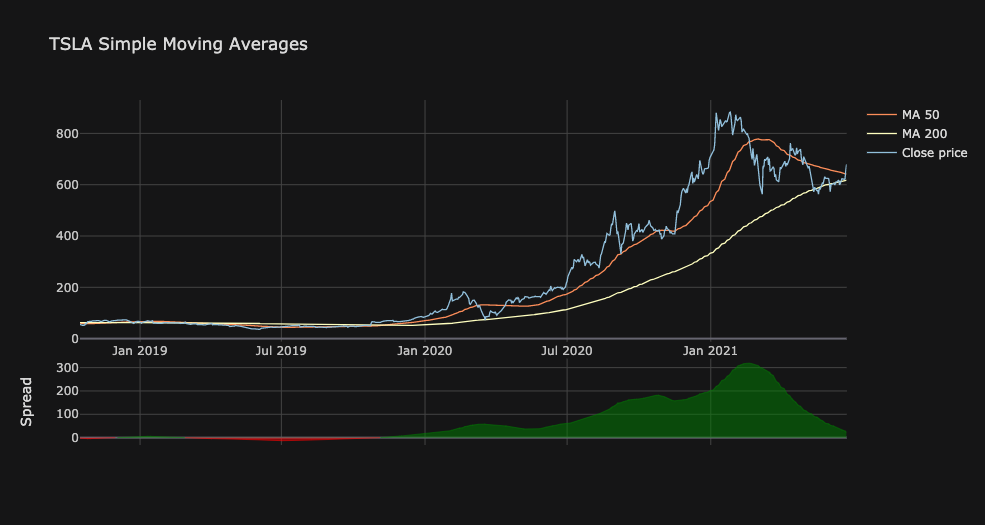

In [14]:
#Cufflinks charts are not available to be viewed in Github. The image below exemplifies the output of the code above 
from IPython.display import Image
Image("tsla_example.png")